***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [3. Positional Astronomy](3_0_Introduction.ipynb)  
    * Previous: [3. Positional Astronomy](3_0_Introduction.ipynb) 
    * Next: [3.2 Hour Angle (HA) and Local Sidereal Time (LST)](3_2_Hour_Angle.ipynb)

***

Import standard modules:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

In [1]:
from IPython.display import HTML
HTML('../style/code_toggle.html')
import healpy as hp
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
import matplotlib
import ephem

Populating the interactive namespace from numpy and matplotlib


## 3.1 Equatorial Coordinates (RA,DEC)

### 3.1.1 The Celestial Sphere

We can use a geographical coordinate system to uniquely identify a position on earth. We normally use the coordinates *latitude* $L_a$ (to measure north and south) and *longitude* $L_o$ (to measure east and west) to accomplish this. The equatorial coordinate system is  depicted in [Fig. 3.1.1 &#10549;](#pos:fig:geo).

<img src='figures/geo.svg' width=60%>

**Figure 3.1.1**: The geographical coordinates latitude $L_a$ and longitude $L_o$. <a id='pos:fig:geo'><!--\label{pos:fig:geo}--></a>

We also require a coordinate system to map the celestial objects. For all intents and purposes we may think of our universe as being projected onto a sphere of arbitrary radius. This sphere surrounds the Earth and is known as the *celestial sphere*. This is not a true representation of our universe, but it is a very useful approximate astronomical construct. The *celestial equator* is obtained by projecting the equator of the earth onto the celestial sphere. The stars themselves do not move on the celestial sphere and therefore have a unique location on it. The Sun is an exception, it changes position in a periodic fashion during the year (as the Earth orbits around the Sun). The path it traverses on the celestial sphere is known as the *ecliptic*.

### 3.1.2 The NCP and SCP

The *north celestial pole* (NCP) is an important location on the celestial sphere and is obtained by projecting the north pole of the earth onto the celestial sphere. The star *Polaris* is very close to the NCP and serves as a reference when positioning a telescope.

The *south celestial pole* (SCP) is obtained in a similar way. The imaginary circle known as the *celestial equator* is in the same plane as the equator of the earth and is obtained by projecting the equator of the earth onto the celestial sphere. The southern hemisphere
counterpart of Polaris is *Sigma Octanis*.

We use a specific point on the celestial equator from which we measure the location of all other celestial objects. This point is known as the *first point of Aries* ($\gamma$) <!--\vernal--> or the *vernal equinox*. The *vernal equinox* is the point where 
the ecliptic intersects the celestial equator (south to north). We discuss the vernal equinox in more detail in [$\S$ 3.2.2 &#10142;](../3_Positional_Astronomy/3_2_Hour_Angle.ipynb#pos:sec:lst) <!--\ref{pos:sec:lst}-->.  

### 3.1.3 Coordinate Definitions: 

We use the *equatorial coordinates* to uniquely identify the location of celestial objects rotating with the celestial sphere around the SCP/NCP axis.

The *Right Ascension* $\alpha$ - We define the *hour circle* of an object as the circle on the celestial sphere that crosses the NCP and the object itself, while also perpendicularly intersecting with the celestial equator. The right ascension of an object is the angular distance between the vernal equinox and the hour circle of a celestial object measured along the celestial equator and is measured eastward. It is measured in **Hours Minutes Seconds** (e.g. $\alpha = 03^\text{h}13^\text{m}32.5^\text{s}$) and spans 360$\circ$ on the celestial sphere from $\alpha = 00^\text{h}00^\text{m}00^\text{s}$ (the coordinates of $\gamma$) to $\alpha = 23^\text{h}59^\text{m}59^\text{s}$. 

The *Declination* $\delta$ - the declination of an object is the angular distance from the celestial equator measured along its hour circle (it is positive in the northern celestial hemisphere and negative in the southern celestial hemisphere). It is measured in **Degrees Arcmin Arcsec** (e.g. $\delta = -15^\circ23'44''$) which spans from $\delta = -90^\circ00'00''$ (SCP) to $+\delta = 90^\circ00'00''$ (NCP).

The equatorial coordinates are presented graphically in [Fig. 3.1.2 &#10549;](#pos:fig:equatorial_coordinates) <!--\ref{pos:fig:equatorial_coordinates}-->. 

<div class=warn>
<b>Warning:</b> As for any spherical system, the Right Ascension of the NCP ($\delta=+90^ \circ$) and the SCP ($\delta=-90^ \circ$) are ill-defined. And a source close to the any celestial pole can have an unintuitive Right Ascension.
</div>

<img src='figures/equatorial.svg' width=500>

**Figure 3.1.2**: The equatorial coordinates $\alpha$ and $\delta$. The vernal equinox $\gamma$, the equatorial reference point is also depicted. The vernal 
equinox is the point where the ecliptic (the path the sun traverses over one year) intersects the celestial equator.<a id='pos:fig:equatorial_coordinates'></a> <!--\label{pos:fig:equatorial_coordinates}-->

<div class=warn>
<b>Warning:</b> One arcminute of the declination axis (e.g. $00^\circ01'00''$) is not equal to one <em>minute</em> in right ascension axis (e.g. $00^\text{h}01^\text{m}00^\text{s}$). <br>
Indeed, in RA, the 24$^\text{h}$ circle is mapped to a 360$^\circ$ circle meaning that 1 hour spans over a section of 15$^\circ$. And as 1$^\text{h}$ is 60$^\text{m}$, therefore 1$^\text{m}$ in RA correspond to $1^\text{m} = \frac{1^\text{h}}{60}=\frac{15^\circ}{60}=0.25'$. <br>
You should be careful about this **factor of 4 difference between RA min and DEC arcmin** (i.e. $\text{RA} \; 00^\text{h}01^\text{m}00^\text{s}\neq \text{DEC} \; 00^\circ01'00''$)
</div>

### 3.1.3 J2000 and B1950

We will be making use of the [<cite data-cite=''>`pyephem` package</cite> &#10548;](http://rhodesmill.org/pyephem/quick.html#body-compute-date) package in the rest of this chapter to help us clarify and better understand some theoretical concepts. The two classes we will be using are the `Observer` and the `Body` class. The `Observer` class acts as a proxy for an array, while the `Body` class embodies a specific celestial object. In this section we will only make use of the `Body` class.      

Earlier in this section I mentioned that the celestial objects do not move on the celestial sphere and therefore have fixed equatorial coordinates. This is not entirely true. Due to the *precession* (the change in the orientation of the earth's rotational axis) the location of the stars do infact change minutely during the course of one generation. That is why we need to link the equatorial coordinates of a celestial object in a catalogue to a specific observational epoch (a specific instant in time). We can then easily compute the true coordinates as they would be today given the equatorial coordinates from a specific epoch as a starting point. There are two popular epochs that are often used, namely J2000  and B1950. Expressed in [<cite data-cite=''>UT (Universal Time)</cite> &#10548;](https://en.wikipedia.org/wiki/Universal_Time):
* B1950 - 1949/12/31 22:09:50 UT,
* J2000 - 2000/1/1 12:00:00 UT.

The 'B' and the 'J'  serve as a shorthand for the *Besselian* year and the *Julian* year respectively. They indicate the lenght of time used to measure one year while choosing the exact instant in time associated with J2000 and B1950. The Besselian year is based on the concept of a [<cite data-cite=''>tropical year</cite> &#10548;](https://en.wikipedia.org/wiki/Tropical_year) and is not used anymore. The Julian year consists of 365.25 days. In the code snippet below we use `pyephem` to determine the J2000 and B1950 equatorial coordinates of *Arcturus*.      

In [5]:
arcturus = ephem.star('Arcturus')
arcturus.compute('2016/2/8',epoch=ephem.J2000)
print('J2000: RA:%s DEC:%s' % (arcturus.ra, arcturus.dec))
arcturus.compute('2016/2/8', epoch=ephem.B1950)
print('B1950: RA:%s DEC:%s' % (arcturus.a_ra, arcturus.a_dec))

J2000: RA:14:16:24.47 DEC:19:06:07.5
B1950: RA:14:13:18.28 DEC:19:24:36.4


### 3.1.4 Example: The 408 MHz Haslam map

To finish things off, let's make sure that given the concepts we have learned in this section we are able to interpret a radio skymap correctly. We will be plotting and inspecting the [<cite data-cite=''>Haslam 408 MHz map</cite> &#10548;](https://lambda.gsfc.nasa.gov/product/foreground/fg_haslam_get.cfm). We load the Haslam map with `read_map` and view it with `cartview`. These two functions form part of the [<cite data-cite=''>`healpy` package</cite> &#10548;](https://healpy.readthedocs.io/en/latest/).      

In [12]:
haslam = hp.read_map('../data/fits/haslam/lambda_haslam408_nofilt.fits')

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


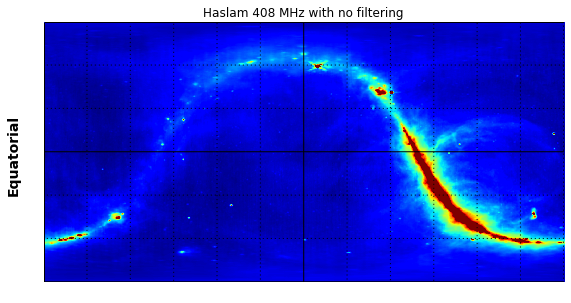

In [6]:
matplotlib.rcParams.update({'font.size': 10})
proj_map = hp.cartview(haslam,coord=['G','C'], max=2e5, xsize=2000,return_projected_map=True,title="Haslam 408 MHz with no filtering",cbar=False)
hp.graticule()

The `cartview` function also produces a projected map as a byproduct (it takes the form of a 2D `numpy` array). We can now replot this projected map using `matplotlib` (see [Fig. 3.1.3 &#10549;](#pos:fig:haslam_map) <!--\ref{pos:fig:haslam_map}-->). We do so in the code snippet that follows. 

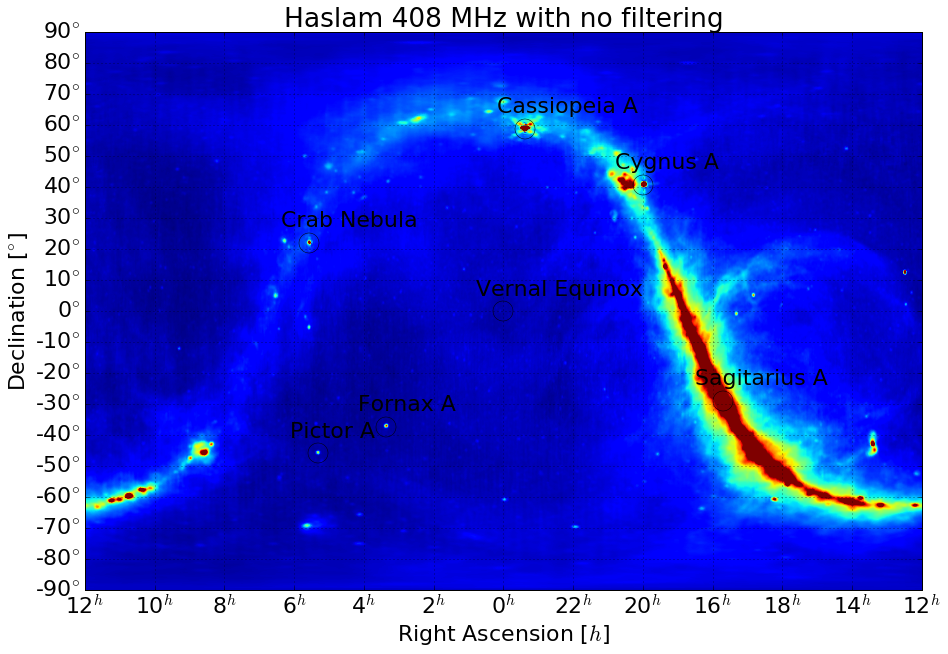

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams.update({'font.size': 22})

#replot the projected healpy map
ax.imshow(proj_map[::-1,:],vmax=2e5, extent=[12,-12,-90,90],aspect='auto')

names = np.array(["Vernal Equinox","Cassiopeia A","Sagitarius A","Cygnus A","Crab Nebula","Fornax A","Pictor A"])
ra = np.array([0,(23 + 23./60 + 24./3600)-24,(17 + 42./60 + 9./3600)-24,(19 + 59./60 + 28./3600)-24,5+34./60+32./3600,3+22./60+41.7/3600,5+19./60+49.7/3600])
dec = np.array([0,58+48./60+54./3600,-28-50./60,40+44./60+2./3600,22+52./3600,-37-12./60-30./3600,-45-46./60-44./3600])

#mark the positions of important radio sources
ax.plot(ra,dec,'ro',ms=20,mfc="None")
for k in xrange(len(names)):
    ax.annotate(names[k], xy = (ra[k],dec[k]), xytext=(ra[k]+0.8, dec[k]+5))

#create userdefined axis labels and ticks
ax.set_xlim(12,-12)
ax.set_ylim(-90,90)
ticks = np.array([-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90])
plt.yticks(ticks)
ticks = np.array([12,10,8,6,4,2,0,-2,-4,-8,-6,-10,-12])
plt.xticks(ticks)
plt.xlabel("Right Ascension [$h$]")
plt.ylabel("Declination [$^{\circ}$]")
plt.title("Haslam 408 MHz with no filtering")

#relabel the tick values
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = np.array(["12$^h$","10$^h$","8$^h$","6$^h$","4$^h$","2$^h$","0$^h$","22$^h$","20$^h$","18$^h$","16$^h$","14$^h$","12$^h$"])
ax.set_xticklabels(labels)
labels = [item.get_text() for item in ax.get_yticklabels()]
labels = np.array(["-90$^{\circ}$","-80$^{\circ}$","-70$^{\circ}$","-60$^{\circ}$","-50$^{\circ}$","-40$^{\circ}$","-30$^{\circ}$","-20$^{\circ}$","-10$^{\circ}$","0$^{\circ}$","10$^{\circ}$","20$^{\circ}$","30$^{\circ}$","40$^{\circ}$","50$^{\circ}$","60$^{\circ}$","70$^{\circ}$","80$^{\circ}$","90$^{\circ}$"])
ax.set_yticklabels(labels)
ax.grid('on')

**Figure 3.1.3**: The 408 MHz Haslam map in equatorial coordinates. The location of some bright radio sources are pointed out with large black circles. <a id='pos:fig:haslam_map'></a> <!--\label{pos:fig:haslam_map}-->

To make sure that you are able to interpret [Fig. 3.1.3 &#10549;](#pos:fig:haslam_map) <!--\ref{pos:fig:haslam_map}--> correctly try to find the 
location of Pictor A from first principals. The equatorial coordinates of Pictor A is $\alpha = 5^\text{h}19^\text{m}49.7^\text{s}$ and $\delta = -45^\circ 46'44''$. 

***

Next: [3.2 Hour Angle (HA) and Local Sidereal Time (LST)](3_2_Hour_Angle.ipynb)

<div class=warn><b>Future Additions:</b></div>

* add section on converting between ECEF and geodetic coordinates, see ecef.py ; introduce ITRF coordinates